# Visualization  
## Author: Babatunde John Olanipekun.  

# Home work 2
A Personal Data Visualization is due. Using any tools, software, media of your choosing, tell us something about yourself, in the form of a data visualization.

### folds  
https://www.pinterest.com/pin/516506651000652118/

### aeriel alps  
https://vrglaciers.wp.worc.ac.uk/Roseg2008/roseg.html

## Field trip.  

One of the best places I visited was the Italian Alps for field work as a geologist.  
I thought I might share a picture to remind me of my days as a geologist.  

## Image Treatment and Manipulation  
### Using OpenCV


## OpenCV 
- I could have used my favorite image design tool, CorelDraw for this image manipulation much better but as a Data Scientist, I think I need to learn OpenCV.   
- I will use the opportunity to learn some skills in openCV.

## Theme. 

- The idea here is to show a view of the mountains in the Alps.  
- Then to show what such mountains looks internally.  


In [1]:
import cv2
import os
import numpy as np
import copy

In [2]:
#path where the images are located
alps_path = r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Visualization\alps_image.JPG"
folds_path = r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Visualization\folds.JPG"

In [3]:
#read in the images.
alps_img = cv2.imread(alps_path)
folds_img = cv2.imread(folds_path)

### Display these images side by side

In [4]:
f"alps shape is {alps_img.shape} and folds shape is {folds_img.shape}"

'alps shape is (937, 1537, 3) and folds shape is (357, 537, 3)'

## Display the image.  

In [5]:
#resize the folds image to that of alps image to enable us display them side by side.
#concatenate requires the same dimension for all items.

f"alps width is {alps_img.shape[1]} and alps height is {alps_img.shape[0]}"
dim = (alps_img.shape[1], alps_img.shape[0])
fold_resized = cv2.resize(folds_img, dim, interpolation = cv2.INTER_AREA)

fold_resized_rgb = cv2.cvtColor(fold_resized, cv2.COLOR_BGR2RGB) #Convert the color system to RGB that we know better
alps_img_rgb = cv2.cvtColor(alps_img, cv2.COLOR_BGR2RGB)



In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.rcParams['figure.figsize'] = (16, 16)

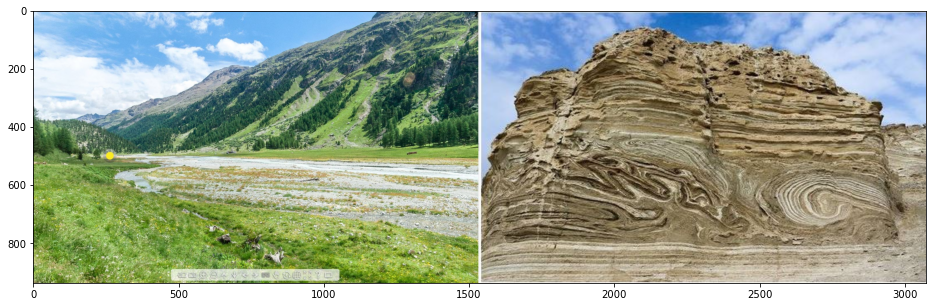

In [7]:
# concatanate image Horizontally
alps_fold = np.concatenate((alps_img_rgb, fold_resized_rgb), axis=1)
plt.imshow(alps_fold)

**Place a smaller image of the fold structure in the middle of the alps so we can see both in a single image**

In [8]:
scale_percent = 60 # percent of original size
width = int(folds_img.shape[1] * scale_percent / 100)
height = int(folds_img.shape[0] * scale_percent / 100)
dim1 = (width, height)
  
# resize image
folds_img_small = cv2.resize(fold_resized_rgb, dim1, interpolation = cv2.INTER_AREA)

In [9]:
alps_manip = copy.deepcopy(alps_img_rgb)

In [10]:
alps_manip.shape, folds_img_small.shape

((937, 1537, 3), (214, 322, 3))

- Create a smaller version of the folds images.  
- index into the alps image array using the shape of the small folds images.  
- assign the values of the small folds images to their corresponding index locations in the alps image.  

In [11]:
middle_h_alps = int(alps_manip.shape[0]*0.5)
middle_w_alps = int(alps_manip.shape[1]*0.5)

In [12]:
alps_manip[middle_h_alps:middle_h_alps+folds_img_small.shape[0],
           middle_w_alps:middle_w_alps+folds_img_small.shape[1]]=folds_img_small[0:folds_img_small.shape[0],
                                                                                 0:folds_img_small.shape[1]]

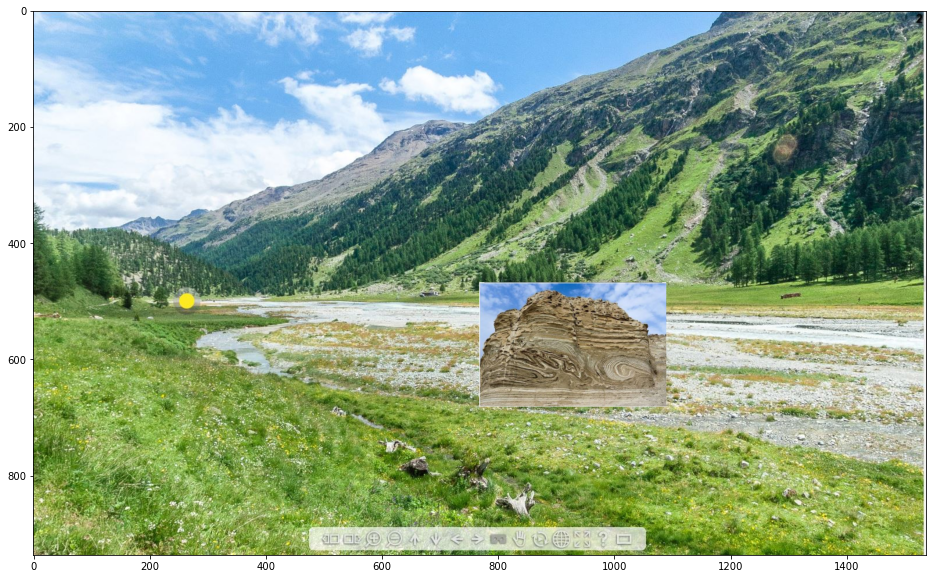

In [13]:
plt.imshow(alps_manip)

## Display the final result here.  
**Note**  
A series of iterate vlaues were used for the text and annotation before arriving at the optimal one.  
The figure size was also tuned various times.  


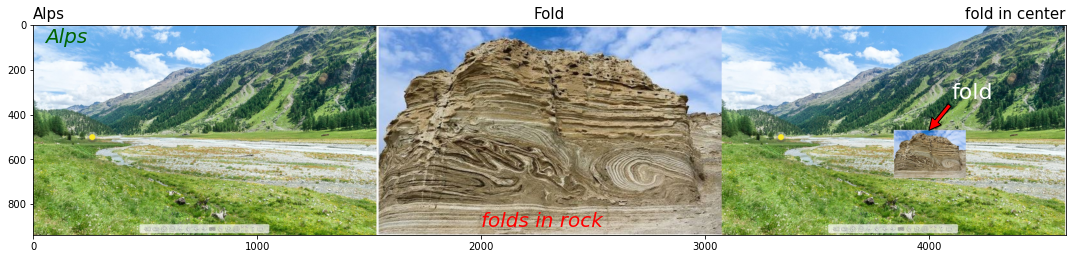

In [28]:
# concatanate image Horizontally
alps_fold = np.concatenate((alps_img_rgb, fold_resized_rgb, alps_manip), axis=1)

fig = plt.figure()
fig = plt.gcf()
fig.set_size_inches(18.5, 16.5)
ax = fig.add_subplot(111)
# Adding title
ax.set_title('Alps', fontsize=15, loc='left')
ax.set_title('Fold', fontsize=15, loc='center')
ax.set_title('fold in center', fontsize=15, loc='right')
# Adding annotation on the plot.
ax.text(50, 80, 'Alps', style='italic', fontsize=20, color='darkgreen')
ax.text(2000, 900, 'folds in rock', style='italic', fontsize=20, color='red')
ax.annotate('fold', xy=(4000, 470), xytext=(4100, 330), color='white', fontsize=22,arrowprops=dict(facecolor='red', shrink=0.0005))
plt.imshow(alps_fold)